# Data-X Spring 2018: Homework 05

### Linear regression, logistic regression, matplotlib.


In this homework, you will do some exercises with prediction and plotting. 

REMEMBER TO DISLPAY ALL OUTPUTS. If the question asks you to do something, make sure to print your results so we can easily see that you have done it.


## Part 1 - Regression


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1.1
Read the data file in python. Check if there are any NaN values, and print the results.

Describe data features in terms of type, distribution range (max and min), and mean values. 

Plot feature distributions. This step should give you clues about data sufficiency.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
energy = pd.read_csv('Energy.csv')
energy.isna().values.any()
energy.isnull().values.any()
print(r"""There is(are)""", 
      energy.isnull().sum().sum() ,
      r"""NaN value(s) in 'energy' dataframe.""")

False

False

There is(are) 0 NaN value(s) in 'energy' dataframe.


So there is no NaN values in this dataframe.

In [4]:
energy.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
dtype: object

In [5]:
energy.describe().loc[['max','min','mean'],]

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
max,0.980000,808.500000,416.5,220.500000,7.00,5.0,0.400000,5.0000,43.100000
min,0.620000,514.500000,245.0,110.250000,3.50,2.0,0.000000,0.0000,6.010000
mean,0.764167,671.708333,318.5,176.604167,5.25,3.5,0.234375,2.8125,22.307201


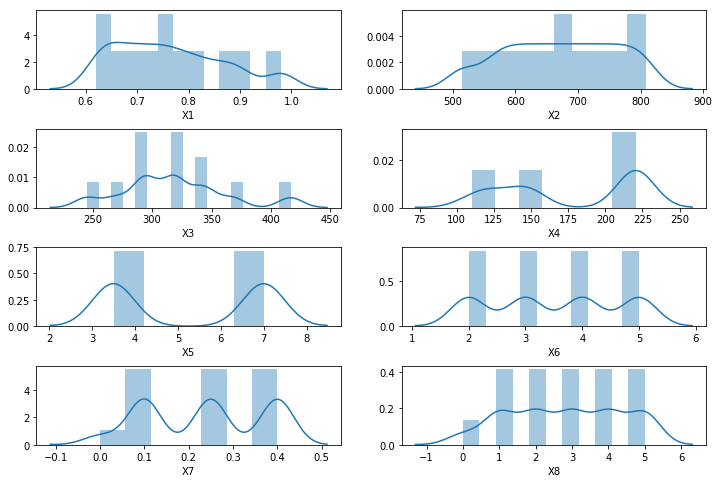

In [6]:
fig = plt.figure(figsize=(12,8))

ax1 = plt.subplot(421)
ax1 = sns.distplot(energy['X1'])

ax2 = plt.subplot(422)
ax2 = sns.distplot(energy['X2'])

ax3 = plt.subplot(423)
ax3 = sns.distplot(energy['X3'])

ax4 = plt.subplot(424)
ax4 = sns.distplot(energy['X4'])

ax5 = plt.subplot(425)
ax5 = sns.distplot(energy['X5'])

ax6 = plt.subplot(426)
ax6 = sns.distplot(energy['X6'])

ax7 = plt.subplot(427)
ax7 = sns.distplot(energy['X7'])

ax8 = plt.subplot(428)
ax8 = sns.distplot(energy['X8'])

plt.subplots_adjust(hspace = 0.5)


 __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.  

__Q 1.2: Train a linear regression model on 80 percent of the given dataset, what is the intercept value and coefficient values.__



In [7]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

RegressionModel = linear_model.LinearRegression()

X=energy[['X1','X2','X3','X4','X5','X6','X7','X8']]
Y=energy['Y1']
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    train_size=0.8, 
                                                    random_state=100)

print ('Training a Linear Regression Model..')
reg = RegressionModel.fit(x_train, y_train)
coef = reg.coef_
intercept = reg.intercept_ 
print('The coefficient is', coef)
print('The intercept is', intercept)

Training a Linear Regression Model..
The coefficient is [-6.33926290e+01 -5.86380428e-02  3.46024305e-02 -4.66202367e-02
  4.36194652e+00  1.81224259e-02  1.98760201e+01  2.19167208e-01]
The intercept is 79.13116174147392



#### Q.1.3: Report model performance using 'ROOT MEAN SQUARE' error metric on:  
__1. Data that was used for training(Training error)__   
__2. On the 20 percent of unseen data (test error) __ 



In [8]:
predicted_train = RegressionModel.predict(x_train)
predicted_test = RegressionModel.predict(x_test)

def rms_error(predict, y):
    return np.sqrt(np.mean(np.power((y-predict),2)))
traning_error = rms_error(predicted_train, y_train)
test_error = rms_error(predicted_test, y_test)

print('Training error is',traning_error)
print('Test error is',test_error)

Training error is 2.9242420751260143
Test error is 2.9054136242997686



#### Q1.4: 

Lets us see the effect of amount of data on the performance of prediction model. Use varying amounts of  Training data (100,200,300,400,500,all) to train regression models and report  training error and validation error in each case. Validation data/Test data  is the same as above for  all  these cases.

**Plot error rates vs number of training examples.** Both the training error and the validation error should be plotted. Comment on the relationship you observe in the plot, between the amount of data used to train the model and the validation accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

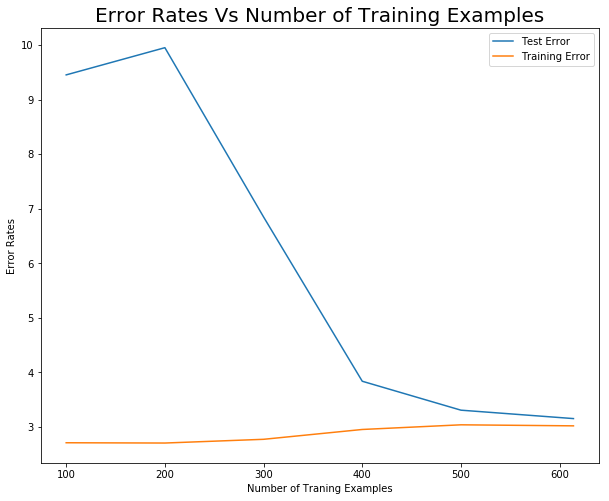

In [10]:
InteractiveShell.ast_node_interactivity = "last_expr"
def num_train(num):
    x_train = energy.iloc[:num,1:8]
    x_test = energy.iloc[num:,1:8]
    y_train = energy.iloc[:num,8]
    y_test = energy.iloc[num:,8]
    
    reg = RegressionModel.fit(x_train, y_train)
    predicted_train = RegressionModel.predict(x_train)
    predicted_test = RegressionModel.predict(x_test)
    training_error = rms_error(predicted_train, y_train)
    test_error = rms_error(predicted_test, y_test)
    #training_error = RegressionModel.score(x_train, y_train)
    #test_error = RegressionModel.score(x_test, y_test)
    test_accuracy=RegressionModel.score(x_test,y_test)
    return training_error,test_error,test_accuracy

range_num = [100,200,300,400,500,614]
training_errors = [num_train(i)[0] for i in range_num]
test_errors = [num_train(i)[1] for i in range_num]
plt.figure(figsize=(10,8))
plt.plot(range_num,test_errors,label='Test Error')
plt.plot(range_num,training_errors,label='Training Error')
plt.title('Error Rates Vs Number of Training Examples',fontsize=20)
plt.xlabel('Number of Traning Examples')
plt.ylabel('Error Rates')
plt.legend()
plt.show()

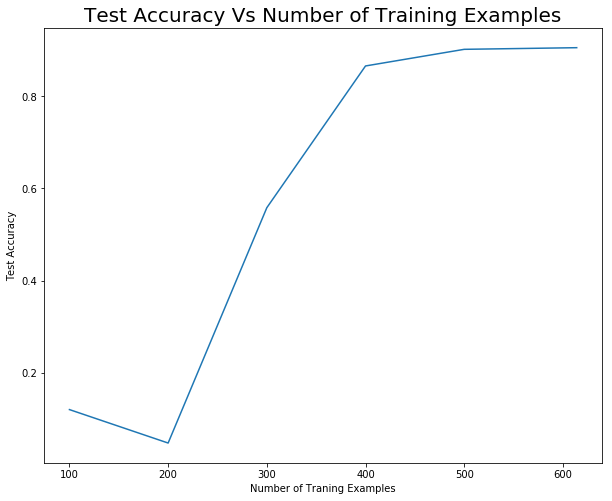

In [11]:
test_accuracy = [num_train(i)[2] for i in range_num]
plt.figure(figsize=(10,8))
plt.plot(range_num,test_accuracy)
plt.title('Test Accuracy Vs Number of Training Examples',fontsize=20)
plt.xlabel('Number of Traning Examples')
plt.ylabel('Test Accuracy')
plt.show()

Comment:

Along with the increasing of number of training examples, the test error initially increases a little and tends to decrease when the number of training examples is larger than 200. The training error gradually inceases of which range is kind of small compared with the test error. The result makes sense beacause when the number of training examples increses, the number of test examples decreases and the model become more general to fit test data.
So, Along with the increasing of number of training examples, the test accuracy initially decreases a little and tends to increase when the number of training examples is larger than 200.

## Part 2 - Classification


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance. You can also output the probabilities of an instance belnging to a class.  

__ Q 2.1:  Bucket values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:__ 

0: 'Low' ( < 14),   
1: 'Medium'  (14-28),   
2: 'High'  (>28)

This converts the given dataset  into a classification problem, classes being, Heating load is: *low, medium or high*. Use this datset with transformed 'heating load' for creating a  logistic regression classifiction model that predicts heating load type of a building. Use test-train split ratio of 0.8 : 0.2.  

*Report training and test accuracies and  confusion matrices.*


**HINT:** Use pandas.cut

In [12]:
sum(energy['Y1']==14)

0

In [13]:
sum(energy['Y1']==18)

0

So it is safe for us to use pd.cut() because it doesn't matter whether the two sides of interval are closed or open.

In [14]:
heat_load_label = pd.cut(energy['Y1'] , 
                         bins=[energy['Y1'].min()-1,14,18,energy['Y1'].max()],
                         labels=['Low','Medium','High'])
heat_load_label=heat_load_label.map({'Low': 0, 'Medium': 1,'High' :2})
X_reg=X
Y_reg=heat_load_label
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, Y_reg, test_size=0.2, random_state=100)

LogisticRegressionModel = linear_model.LogisticRegression()

# we create an instance of logistic Regression Classifier and fit the data.

LogisticRegressionModel.fit(x_train_reg, y_train_reg)
training_accuracy_reg=LogisticRegressionModel.score(x_train_reg,y_train_reg)
test_accuracy_reg=LogisticRegressionModel.score(x_test_reg,y_test_reg)
print ('Training Accuracy:',training_accuracy_reg)
print ('Test Accuracy:',test_accuracy_reg)

Training Accuracy: 0.8859934853420195
Test Accuracy: 0.9090909090909091


In [15]:
from sklearn.metrics import confusion_matrix
y_true = y_test_reg
y_pred = LogisticRegressionModel.predict(x_test_reg)
ConfusionMatrix=pd.DataFrame(confusion_matrix(y_true, y_pred),
                             columns=['Predicted Low','Predicted Medium','Predicted High'],
                             index=['Actual Low','Actual Medium','Actual High'])
print ('Confusion matrix of test data is: \n',ConfusionMatrix)

Confusion matrix of test data is: 
                Predicted Low  Predicted Medium  Predicted High
Actual Low                42                 1               0
Actual Medium              9                18               1
Actual High                0                 3              80


In [16]:
from sklearn.metrics import precision_score
print("Average precision for the 3 classes is", 
      precision_score(y_true, y_pred, average = None))

Average precision for the 3 classes is [0.82352941 0.81818182 0.98765432]


In [17]:
from sklearn.metrics import recall_score
print("Average recall for the 3 classes is", 
      recall_score(y_true, y_pred, average = None))

Average recall for the 3 classes is [0.97674419 0.64285714 0.96385542]


__ Q2.2: 
One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. 
This makes training less sensitive to the scale of features . 
Scaling is important in algorithms that use distance based classification, SVM or K means or those that involve gradient descent optimization. If we  Scale features in the range [0,1] it is called unity based normalization.__

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [18]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = pd.DataFrame(min_max_scaler.fit_transform(X))

X_reg_new = X_train_minmax
Y_reg_new=heat_load_label
x_train_reg_new, x_test_reg_new, y_train_reg_new, y_test_reg_new = train_test_split(
    X_reg_new, Y_reg_new, test_size=0.2, random_state=100)

LogisticRegressionModelScale = linear_model.LogisticRegression()

# we create an instance of logistic Regression Classifier and fit the data.

LogisticRegressionModelScale.fit(x_train_reg_new, y_train_reg_new)
training_accuracy_reg_new=LogisticRegressionModelScale.score(
    x_train_reg_new,y_train_reg_new)
test_accuracy_reg_new=LogisticRegressionModelScale.score(
    x_test_reg_new,y_test_reg_new)
print ('Training Accuracy:',training_accuracy_reg_new)
print ('Test Accuracy:',test_accuracy_reg_new)

Training Accuracy: 0.8973941368078175
Test Accuracy: 0.948051948051948


Compared with previous model, the performances in training and validation of this model are both better, proving the feature scaling improve the training accuracy and test accuracy in this case.

## Part 3 - Matplotlib

**Q 3.1a. Create a dataframe called `icecream` that has column `Flavor` with entries `Strawberry`, `Vanilla`, and `Chocolate` and another column with `Price` with entries `3.50`, `3.00`, and `4.25`. **

In [19]:
icecream = pd.DataFrame({'Flavor':['Strawberry','Vanilla','Chocolate'],
                        'Price':[3.50,3.00,4.25]})

**Q 3.1b 
Create a bar chart representing the three flavors and their associated prices.**

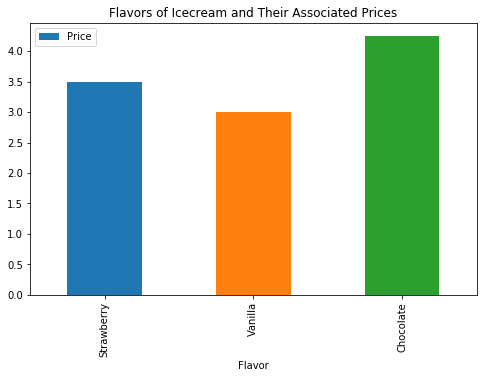

In [20]:
icecream.plot.bar(x='Flavor', y='Price', figsize=(8,5), 
                  title='Flavors of Icecream and Their Associated Prices')

**Q 3.2   Create 9 random plots (Hint: There is a numpy function for generating random data). The top three should be scatter plots (one with green dots, one with purple crosses, and one with blue triangles. The middle three graphs should be a line graph, a horizontal bar chart, and a histogram. The bottom three graphs should be trignometric functions (one sin, one cosine, one tangent).**

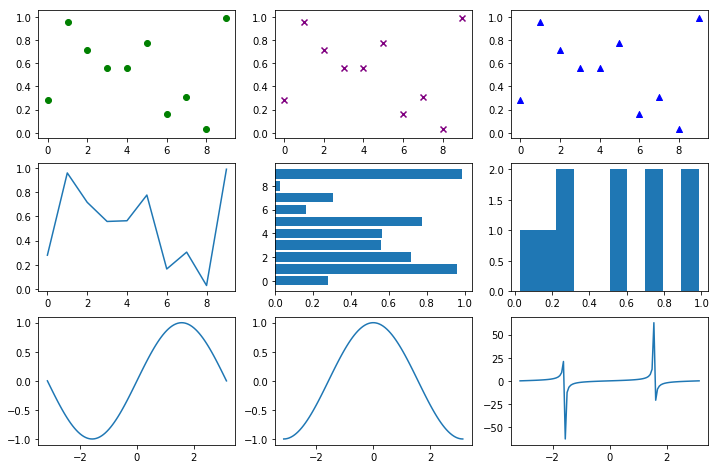

In [21]:
random_num = np.random.rand(10)

fig = plt.figure(figsize=(12,8))

ax1 = plt.subplot(331)
ax1 = plt.scatter(range(10),random_num,color='green')

ax2 = plt.subplot(332)
ax2 = plt.scatter(range(10),random_num,color='purple',marker='x')

ax3 = plt.subplot(333)
ax3 = plt.scatter(range(10),random_num,color='blue',marker='^')

ax4 = plt.subplot(334)
ax4 = plt.plot(range(10),random_num)

ax5 = plt.subplot(335)
ax5 = plt.barh(range(10),random_num)

ax6 = plt.subplot(336)
ax6 = plt.hist(random_num)

ax7 = plt.subplot(337)
ax7 = plt.plot(np.linspace(-np.pi,np.pi,100),
               np.sin(np.linspace(-np.pi,np.pi,100)))

ax8 = plt.subplot(338)
ax8 = plt.plot(np.linspace(-np.pi,np.pi,100),
               np.cos(np.linspace(-np.pi,np.pi,100)))

ax9 = plt.subplot(339)
ax9 = plt.plot(np.linspace(-np.pi,np.pi,100),
               np.tan(np.linspace(-np.pi,np.pi,100)))